number of contour path 1
len(Z) 437
Nyquist index 218
Number of components from both sides: 11 10
len(Z_filt) 437
number of contour path 1
len(Z) 817
Nyquist index 408
Number of components from both sides: 11 10
len(Z_filt) 817
number of contour path 2
len(Z) 709
Nyquist index 354
Number of components from both sides: 11 10
len(Z_filt) 709


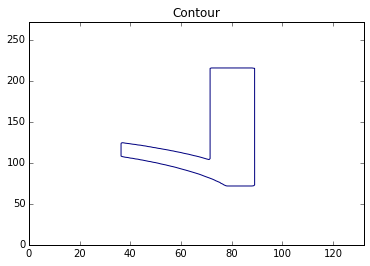

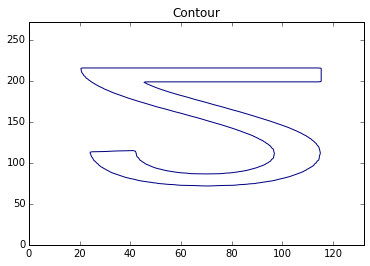

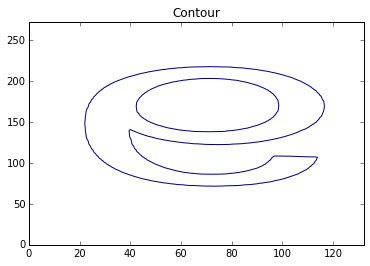

In [4]:
%matplotlib inline
'''
FOURIER DESCRIPTOR

Hello Zachary...so I didn't finish the code. The functions all function propperly but
as of now argparse is not functioning propperly and I am figuring out how to plot all 
the numbers correctly. I hope this helps.

By Jacob Baca
Partner: Terry Tran

'''

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
from skimage import feature

def extract_shape(im_file, blowup = 1., plot_img = False, plot_contour = False, plot_contour_pts = False):
    
    im = mpimg.imread(im_file)
    if len(im.shape) == 3:
        im = im[:,:,0]
    
    plt.figure()
    if plot_img == True:
        plt.imshow(im, cmap=plt.cm.gray)
        plt.title('The Image')
        plt.show()
        
    x = np.arange(im.shape[1])*blowup
    y = np.arange(im.shape[0])*blowup
    
    # make 2D coordinate grid 
    X, Y = np.meshgrid(x, y)
    plt.figure()

    plt.title('Contour')
    CS = plt.contour(X, Y, im, 1)

    cs_paths = CS.collections[0].get_paths()

    print 'number of contour path', len(cs_paths)
    p = cs_paths[0]
    v = p.vertices
    x_ar = v[:,0]
    y_ar = v[:,1]
        
    if plot_contour_pts:
        plt.figure()
        plt.title("Verify the contour points are correct")
        plt.scatter(x_ar, y_ar)
        plt.show()

    return x_ar, y_ar

def FD(x, y, plot_FD = False, y_lim = None):    
    N = len(x)
    n = np.arange(N)

    z = x + y*1j
    Z = np.fft.fft(z)

    if plot_FD:
        plt.figure()
        plt.title('FD real and imag')
        plt.plot(Z.real, 'b-')
        plt.plot(Z.imag, 'g-')
        if y_lim != None:
            plt.ylim([-y_lim, y_lim])

    return Z

def filt_FD(Z, n_keep, no_zeroth = True):
    N = len(Z)
    n = np.arange(len(Z))
    print 'Nyquist index', N/2
    # in case I want the centroid position.
    filt0 = n > 0 if no_zeroth else 1
    filt1 = filt0*(n <= n_keep)    
    filt2 = (n > ((N-1) - n_keep))
    print 'Number of components from both sides:', filt1.sum(), filt2.sum()
    filt = filt1 + filt2
    #print Z.real[N/2]
    return Z*filt
    
def get_FD_abs(x, y, order = 10, norm = True, no_zeroth = True):
    '''Finds the Fourier Descriptors and the recovered x and y for a shape.'''
    Z = FD(x, y)
    print 'len(Z)', len(Z)

    Z_filt = filt_FD(Z, order, no_zeroth=no_zeroth)
    if norm:
        Z_filt = size_norm(Z_filt)
    print 'len(Z_filt)', len(Z_filt)
    x_rec, y_rec = recover_shape(Z_filt)

    # throw away zero terms
    fd_mag = np.abs(Z_filt[Z_filt != 0])
    #fd_mag = fd_mag[fd_mag > 0]
    
    return fd_mag, x_rec, y_rec

def recover_shape(Z):
    z_rec = np.fft.ifft(Z)
    x_rec = z_rec.real
    y_rec = z_rec.imag
    
    return x_rec, y_rec

def size_norm(Z):
    shutup =  Z/np.sqrt( np.abs(Z[1])*np.abs(Z[-1]) )
    return shutup

order = 10
norm = False
no_zeroth = False

plt.figure()

one_x, one_y = extract_shape('number1.png') #, blowup = 1., plot_img = True, plot_contour = True, plot_contour_pts = True)
one_fd, x1_rec, y1_rec = get_FD_abs(one_x, one_y, order = order, norm = norm, no_zeroth = no_zeroth)
for i in range(len(one_x)):
    plt.plot(x1_rec[i], y1_rec[i])

two_x, two_y = extract_shape('number2.png') #, blowup = 1., plot_img = True, plot_contour = True, plot_contour_pts = True)
two_fd, x2_rec, y2_rec = get_FD_abs(two_x, two_y, order = order, norm = norm, no_zeroth = no_zeroth)
for i in range(len(two_x)):
    plt.plot(x2_rec[i], y2_rec[i])

six_x, six_y = extract_shape('number6.png') #, blowup = 1., plot_img = True, plot_contour = True, plot_contour_pts = True)
six_fd, x6_rec, y6_rec = get_FD_abs(six_x, six_y, order = order, norm = norm, no_zeroth = no_zeroth)
for i in range(len(six_x)):
    plt.plot(x6_rec[i], y6_rec[i])
                             
# plt.show()

                       
# parser = argparse.ArgumentParser(description = 'keep this many terms: '
# parser.add_argument('order', metavar='O', type=int, nargs='+',help='an integer for order')
# args = parser.parse_args('order', '9')
# # two dashes in front because there is a dash in no-norm
# parser.add_argument('--no-norm', dest=‘norm', \
# action=‘store_false')
# parser.add_argument('-zeroth', dest = ‘no_zeroth', \
# action=‘store_false')
# parser.set_defaults(no_zeroth=True, norm=True)